In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/telcom_users_steam.csv')
data.shape

(7081, 9)

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# 独热编码
data = pd.get_dummies(data)
data.head(5)

,is_increase,age,Education_Level,consume,App,Gender_F,Gender_M,Cellphone_Android,Cellphone_iPhone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Level_Blue,Level_Gold,Level_Platinum,Level_Silver
0,0,2,1,32,5,0,1,0,1,0,1,0,1,0,0,0
1,0,2,2,31,6,1,0,0,1,0,0,1,1,0,0,0
2,0,1,2,33,4,0,1,0,1,0,1,0,1,0,0,0
3,0,3,1,32,5,0,1,0,1,0,1,0,1,0,0,0
4,0,2,2,32,3,0,1,1,0,0,1,0,1,0,0,0


In [4]:
#去除标签，并转换一下数据格式
# 数据与标签
import numpy as np
# 标签
labels = np.array(data['is_increase'])
# 在特征中去掉标签
features= data.drop('is_increase', axis = 1)
# 名字单独保存一下，以备后患
feature_list = list(features.columns)

In [5]:
# 数据集切分
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [6]:
oversampler=SMOTE(random_state=0)


In [7]:
train_features,train_labels=oversampler.fit_resample(train_features,train_labels)

In [8]:
print('训练集特征:', train_features.shape)
print('训练集标签:', train_labels.shape)
print('测试集特征:', test_features.shape)
print('测试集标签:', test_labels.shape)

训练集特征: (8936, 15)
训练集标签: (8936,)
测试集特征: (1771, 15)
测试集标签: (1771,)


In [9]:
test_labels.sum()



271

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state =42)
classifier.fit(train_features, train_labels)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [11]:
y_pred = classifier.predict(test_features)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)

In [17]:
cm

array([[1050,  450],
       [ 171,  100]], dtype=int64)

In [18]:
Ca = np.array([[1088,12],[24,647]])
Ca

array([[1088,   12],
       [  24,  647]])

In [15]:

from sklearn.metrics import roc_curve, auc  ###计算roc和auc
fpr,tpr,threshold = roc_curve(test_labels, y_pred) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值


<Figure size 432x288 with 0 Axes>

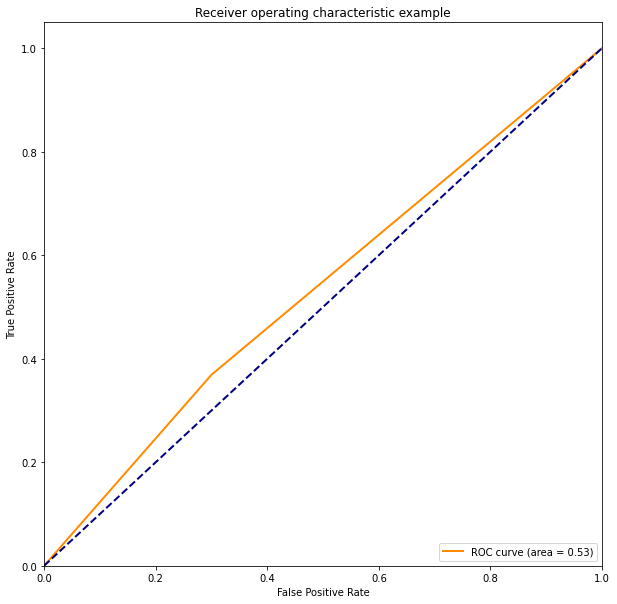

In [20]:
import matplotlib.pyplot as plt
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


NameError: name 'plt' is not defined

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [19]:
# 绘制
import itertools
class_names = [0,1]
plt.figure()
plot_confusion_matrix(Ca                    , classes=class_names
                      , title='Confusion matrix')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# 导入所需工具包
from sklearn.tree import export_graphviz
import pydot #pip install pydot

In [ ]:
# 得到特征重要性
importances = list(classifier.feature_importances_)
# 转换格式
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 对应进行打印
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

In [ ]:
import matplotlib.pyplot as plt

# 指定位置
x_values = list(range(len(importances)))

# 对特征进行排序
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# 累计重要性
cumulative_importances = np.cumsum(sorted_importances)

# 绘制折线图
plt.plot(x_values, cumulative_importances, 'g-')

# 画一条红色虚线，0.95那
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# X轴
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Y轴和名字
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [ ]:
# 对特征进行排序
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# 累计重要性
cumulative_importances = np.cumsum(sorted_importances)
# 绘制折线图
plt.plot(x_values, cumulative_importances, 'g-')
# 画一条红色虚线，0.95那
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# X轴
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Y轴和名字
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');



In [16]:
train_features, test_features

(      age  Education_Level  consume  App  Gender_F  Gender_M  \
 0       2                2       33    2         0         1   
 1       1                1       33    1         0         1   
 2       2                3       32    1         1         0   
 3       2                1       31    3         1         0   
 4       2                2       32    3         0         1   
 ...   ...              ...      ...  ...       ...       ...   
 8931    3                2       32    2         0         1   
 8932    2                3       33    3         0         1   
 8933    6                2       31    3         1         0   
 8934    2                2       31    5         1         0   
 8935    2                1       32    5         0         1   
 
       Cellphone_Android  Cellphone_iPhone  Marital_Status_Divorced  \
 0                     0                 1                        0   
 1                     1                 0                        0   
 2   

In [17]:
# 选择这些特征
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
# 找到它们的名字
important_indices = [feature_list.index(feature) for feature in important_feature_names]



NameError: name 'feature_importances' is not defined

In [18]:
important_indices

NameError: name 'important_indices' is not defined

In [19]:
train_features

,age,Education_Level,consume,App,Gender_F,Gender_M,Cellphone_Android,Cellphone_iPhone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Level_Blue,Level_Gold,Level_Platinum,Level_Silver
0,2,2,33,2,0,1,0,1,0,1,0,1,0,0,0
1,1,1,33,1,0,1,1,0,0,0,1,1,0,0,0
2,2,3,32,1,1,0,0,1,0,0,1,1,0,0,0
3,2,1,31,3,1,0,1,0,0,0,1,1,0,0,0
4,2,2,32,3,0,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,3,2,32,2,0,1,1,0,0,1,0,1,0,0,0
8932,2,3,33,3,0,1,0,1,0,0,1,1,0,0,0
8933,6,2,31,3,1,0,1,0,0,0,0,1,0,0,0
8934,2,2,31,5,1,0,0,1,0,1,0,1,0,0,0


In [20]:
train_features[important_feature_names]

NameError: name 'important_feature_names' is not defined

In [21]:


# 重新创建训练集
important_train_features = train_features[important_feature_names]
important_test_features = test_features[important_feature_names]

# 数据维度
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

NameError: name 'important_feature_names' is not defined

In [22]:
classifier.fit(important_train_features, train_labels)

NameError: name 'important_train_features' is not defined

In [23]:
y_pred = classifier.predict(important_test_features)

NameError: name 'important_test_features' is not defined

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)

In [25]:
cm

array([[1050,  450],
       [ 171,  100]], dtype=int64)

In [26]:
# 要计算时间了
import time
# 这次是用所有特征
all_features_time = []
# 算一次可能不太准，来10次取个平均
for _ in range(10):
    start_time = time.time()
    classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state =42)
    classifier.fit(train_features, train_labels)
    y_pred = classifier.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('使用所有特征时建模与测试的平均时间消耗:', round(all_features_time, 2), '秒.')

使用所有特征时建模与测试的平均时间消耗: 5.19 秒.


In [27]:
# 要计算时间了
import time
# 这次是用所有特征
all_features_time = []
# 算一次可能不太准，来10次取个平均
for _ in range(10):
    start_time = time.time()
    classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state =42)
    classifier.fit(important_train_features, train_labels)
    y_pred = classifier.predict(important_test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('使用所有特征时建模与测试的平均时间消耗:', round(all_features_time, 2), '秒.')

NameError: name 'important_train_features' is not defined